In [101]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srossgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def read_api_key(filepath):
    """
    Read the Yelp API Key from file.
    
    Args:
        filepath (string): File containing API Key
    Returns:
        api_key (string): The API Key
    """
    
    # feel free to modify this function if you are storing the API Key differently
    with open('api_key.txt', 'r') as f:
        return f.read().replace('\n','')

In [114]:
def all_restaurants(api_key, query):
    """
    Retrieve ALL the restaurants on Yelp for a given query.

    Args:
        query (string): Search term

    Returns:
        results (list): list of dicts representing each business
    """
    
    # Write solution here
    offsetno=0
    total =0
    output=[]
    headers = {        
        "authorization": 'Bearer %s' % api_key, # for the yelp API     
    }
    while (offsetno<=total):
        params = { #parameters are case sensitive!
            "location": query,
            "limit": 20,
            "offset": offsetno,
            "categories": "restaurants"
            
        }
    
        response = requests.get('https://api.yelp.com/v3/businesses/search',
                            headers=headers, params=params)
        result = response.json()
        try:
            output.append( result['businesses'])
        except KeyError:
            print(result)
            return output
        offsetno =offsetno + 20
        total = result['total']
        print (offsetno)
    return(output)    

In [115]:
api_key = read_api_key('api_key.txt')
data = all_restaurants(api_key, 'Miami')

{'error': {'code': 'VALIDATION_ERROR', 'description': 'The supplied limit: -20 is invalid, the maximum is 50.'}}


In [ ]:
new_data = {}
new_data["name"]=[]
new_data["rating"]=[]
new_data["price"]=[]
new_data["review_count"]=[]
new_data["url"]=[]
new_data["category"]=[]
new_data["zip"]=[]
alldata=[]
ids=[]
name=[]
zips=[]
for i in data:
    for each in i:
        new_data["name"].append(each["name"])
        new_data["rating"].append(each["rating"])
        new_data["url"].append(each["url"])
        try:
            new_data["price"].append(each["price"])
        except KeyError:
            new_data["price"].append(None)

        new_data["review_count"].append(each["review_count"])
        new_data["category"].append(each["categories"][0]["title"])
        new_data["zip"].append(each["location"]["zip_code"])
        ids.append(each["id"])
        name.append(each["name"])
        zips.append(each["location"]["zip_code"])
        alldata.append(each)

In [73]:
def get_reviews(ids,name):
    headers = {        
        "authorization": 'Bearer %s' % api_key, # for the yelp API     
    }
    restau_names=[]
    output=[]
    for i in range(len(ids)):
        params = { #parameters are case sensitive!
            "locale": "en_US",
        }
        url = "https://api.yelp.com/v3/businesses/"+str(ids[i])+"/reviews"
        response = requests.get(url,
                            headers=headers,params=params)
        result = response.json()
        output.append(result["reviews"])
        restau_names.append(name[i])
    return output,restau_names
reviews, restau_name= get_reviews(ids,name)

In [84]:
restau=[]
text_reviews=[]
loc_zip=[]
for i in range(len(reviews)):
    for each in output[i]["reviews"]:
        text_reviews.append(each["text"])
#         print(i)
        restau.append(name[i])
        loc_zip.append(zips[i])
d = {'restau_name':restau,'zip':loc_zip,'reviews':text_reviews}
reviews_df = pd.DataFrame(d)

In [86]:
reviews_df.to_csv("reviews_df.csv",index=False)

In [19]:
df = pd.DataFrame(new_data)
df.to_csv("Miami_Yelp.csv",index=False)

In [72]:
df_all = pd.DataFrame(alldata)
df_all.to_csv("Miami_raw.csv",index=False)

-------

In [41]:
df = pd.read_excel("/Users/srossgupta/Desktop/Data Focussed Python/HungryGator/DataFiles/Project_prototype_datafiles.xlsx",sheet_name="MergedData")

In [100]:
new_df = df[df["Source"]=="TripAdvisor"]
new_df["check"] = new_df["Address"].str[-5:].str.isdigit()


/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [211]:
def check(df):
    try:
        if df["check"]==False:
            df["new_zip"]=""
        if df["check"]==True and df["Address"][-10:].find("-")==-1:
            df["new_zip"]=df["Address"][-5:]
        if df["check"]==False and df["Address"][-10:].find("-")!=-1:
            df["new_zip"]= df["Address"][-10:][:df["Address"][-10:].find("-")]
    except AttributeError: 
        df["new_zip"]=""
    except TypeError:
        df["new_zip"]=""
        
    return df

In [202]:
new= new_df[~new_df.Address.isnull()]

In [209]:
new= new.apply(check, axis=1)
new.to_csv("tripadvisor.csv")

-1
-1
-1
-1
5
rere
-1
5
rere
-1
-1
-1
5
rere
-1
5
rere
-1
5
rere
-1
-1
5
rere
-1
-1
-1
-1
5
rere
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
5
rere
-1
5
rere
-1
5
rere
-1
-1
-1
-1
-1
5
rere
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
5
rere
5
rere
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
5
rere
-1
5
rere
-1
-1
-1
5
rere
-1
-1
5
rere
-1
-1
5
rere
-1
-1
-1
-1
-1
5
rere
5
rere
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
5
rere
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
5
rere
-1
5
rere
5
rere
-1
-1
-1
-1
-1
5
rere
5
rere
5
rere
5
rere
-1
-1
-1
-1
5
rere
5
rere
-1
-1
5
rere
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
5
rere
5
rere
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
-1
-1
-1
-1
-1
5
rere
-1
-1
-1
5
rere

Restaurant Name  \
100                  El Malecon Restaurant   
101                       Met Cafe and Bar   
102                         Pollo Tropical   
103           Oriental Bakery & Grocery Co   
104                               El Nopal   
105             Iguana Ranas Mexican Grill   
106                                Pasha's   
107                                 Subway   
108                        Bottega Express   
109   Holy Bagels and Pizzeria of Downtown   
110      Quality Asian Bazaar & Restaurant   
111                  El Rincon Bequisqueya   
112                           Mojito Grill   
113                Voice of The People Ent   
114            Tipicocentro Americano Cafe   
115         Il Mondo Della Pasta\n- CLOSED   
116                        Falconi's Pizza   
117                              La Casita   
118                            Nissi Cafe'   
119                            Papa John's   
120                              KC's Cafe   
121                  Jerry and Joe's Pizza   
122                             Ten Fruits   
123                Habana Vieja Restaurant   
124                         Little Caesars   
125                             McDonald's   
126                     The District Miami   
127                     Bizcaya Restaurant   
128                              Taco Rico   
129                          Daddy's Grill   
...                                    ...   
1318                           Burger King   
1319       Olive Garden Italian Restaurant   
1320                     Linares Cafeteria   
1321                            Don Toston   
1322                          Family Pizza   
1323           El Nuevo Romance Restaurant   
1324                              Villagio   
1325                              Blu Cafe   
1326                    La Nueva Argentina   
1327                        Wild Bean Cafe   
1328                               Pasha's   
1329                Collins Fish & Seafood   
1330              My Little Organic Bistro   
1331                  Mary Take Over Pizza   
1332                     Las Tapas de Rosa   
1333                               Blimpie   
1334    Breezes Restaurant & Nightclub Inc   
1335                            China Town   
1336                     Godfather's Pizza   
1337                            Sushi Meng   
1338                 Natural Chicken Grill   
1339                 The Room Cafe and Bar   
1340                             Taco Bell   
1341             Westchester Cafeteria Inc   
1342                    El Patio Cafeteria   
1343                      Los Thr33 Amigos   
1344                 Qdoba Miami\n- CLOSED   
1345                          Vicky Bakery   
1346                          Bistro Linda   
1347                        Cafe Hong KONG   

                                                    Url          Rating  \
100   http://www.tripadvisor.in/Restaurant_Review-g3...  1,593 of 3,600   
101   http://www.tripadvisor.in/Restaurant_Review-g3...    778 of 3,600   
102   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
103   http://www.tripadvisor.in/Restaurant_Review-g3...    990 of 3,600   
104   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
105   http://www.tripadvisor.in/Restaurant_Review-g3...    849 of 3,600   
106   http://www.tripadvisor.in/Restaurant_Review-g3...    945 of 3,600   
107   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
108   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
109   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
110   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
111   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
112   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
113   http://www.tripadvisor.in/Restaurant_Review-g3...             NaN   
114   http://www.tripadvisor.in/Restaurant_Review

In [210]:
new.to_csv("tripadvisor.csv")

-----

In [91]:
df_reviews= pd.read_csv("reviews_df.csv")

In [94]:
def datacleaning(df):
    #removing @
    df["reviews"]= df.apply(lambda row: re.sub(r'@[\w0-9]+','',row["reviews"],re.IGNORECASE), axis=1)
    #removing URL tags
    df["reviews"]= df.apply(lambda row: re.sub(r'https?://[\w0-9./]+','',row["reviews"],re.IGNORECASE), axis=1)
    df["reviews"]= df.apply(lambda row: re.sub(r'www.[^ ]+','',row["reviews"],re.IGNORECASE), axis=1)
    
    #removing Byte order marks
    df["reviews"]= df.apply(lambda row: row["reviews"].replace(u"\ufffd", "?"), axis=1)
    #Convert the data to lowercase
    df["reviews"]= df.apply(lambda row: row["reviews"].lower(), axis=1)    
    #removing hashtag/numbers and punctuations
    df["reviews"]= df.apply(lambda row: re.sub(r"[^a-zA-Z ]+",'',row["reviews"]), axis=1)
    return df
df_reviews = datacleaning(df_reviews)

In [97]:
def handle_length(text):
    tokenizer = nltk.tokenize.word_tokenize
    words = tokenizer(text)
    fin=[]
    for word in words:
        if len(word)>1:
            fin.append(word)
    return " ".join(fin)    
df_reviews["reviews"] = df_reviews["reviews"].apply(handle_length)

In [106]:
def filter_data_byzip(df,zip_code):
    df_ = df.copy()
    df_ = df_[df_["zip"]==zip_code]
    return " ".join(list(df_["reviews"]))

Enter the Zipcode:33134


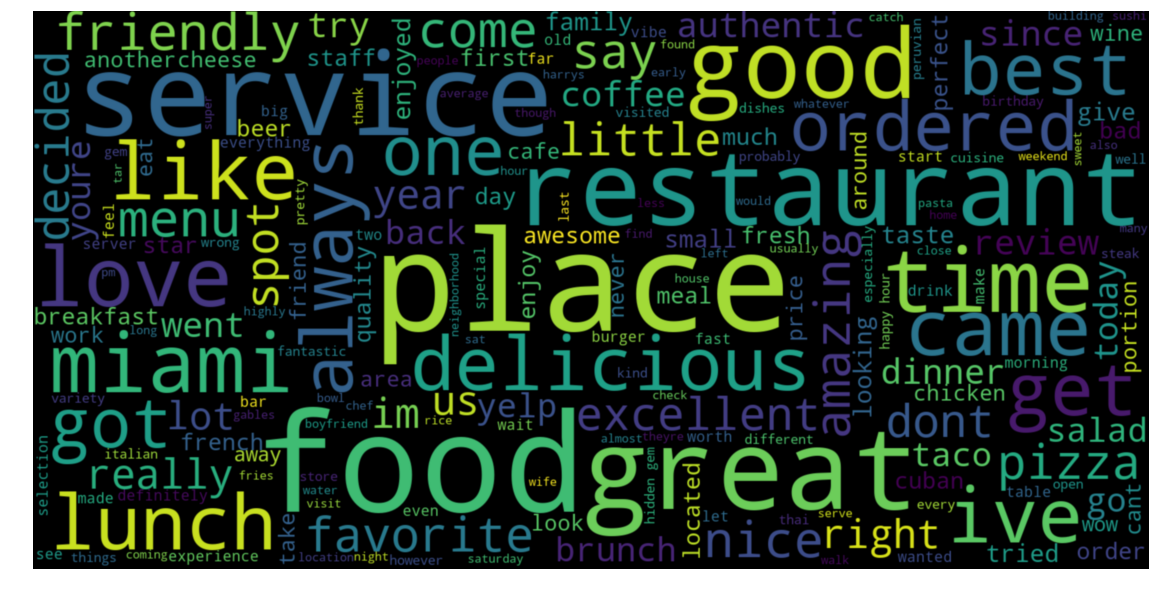

In [118]:
val = int(input("Enter the Zipcode:"))
reviews_list= filter_data_byzip(df_reviews,val)
if len(reviews_list)!=0:
    wc = WordCloud(width=1600, height=800,max_font_size=200,stopwords=nltk.corpus.stopwords.words('english')\
                         , colormap="viridis").generate(reviews_list)
    plt.figure(figsize=(20,18))
    plt.imshow(wc, interpolation="bicubic")
    plt.axis("off")
    plt.show()
else:
    print("enter the zip code in the list")

In [119]:
reviews_list

'service was excellent there were lot of open seats we were waited on very consistently drinks were always refilled and service was very friendly average at best have no idea what authentic cuban food tastes like but whatever got here was pretty awful ordered dishes ox tail was way too following the marlins game on easter sunday versailles restaurant jumped out at me on yelpi first want to comment on the service it was top rate was service was excellent there were lot of open seats we were waited on very consistently drinks were always refilled and service was very friendly average at best have no idea what authentic cuban food tastes like but whatever got here was pretty awful ordered dishes ox tail was way too following the marlins game on easter sunday versailles restaurant jumped out at me on yelpi first want to comment on the service it was top rate was service was excellent there were lot of open seats we were waited on very consistently drinks were always refilled and service wa